In [1]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for wordcloud making and image importing
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image

# And libraries for data transformation
import datetime

#words counter
from collections import Counter
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import spacy
from nltk.tokenize import word_tokenize


# sentiment 
from textblob import TextBlob


In [2]:
# load data
df = pd.read_csv('tweets/sample1.csv')
df.head()

,screen_name,created_at,location,source,hashtags,text
0,Urbandave65,2020-04-21 16:29:36,"Maple Valley, WA",Twitter for iPhone,NaN,@Restlessmom1 @BillFOXLA @sheriffmcmahon @FOXL...
1,ASteiner,2020-04-21 16:29:36,"New York, USA",Twitter Web App,"development, COVID19, StrongerTogether",Thank you to @OECD &amp; donor countries for y...
2,potter_reagan,2020-04-21 16:29:35,"Oregon, USA",Twitter for iPhone,NaN,have you seen covid plague plague who showed u...
3,49erAlumni,2020-04-21 16:29:35,"UNC Charlotte, Charlotte, NC",Twitter Web App,49erAlumni,We know that you — our #49erAlumni — are confr...
4,CBSPhilly,2020-04-21 16:29:35,"Philadelphia, PA",TweetDeck,"Coronavirus, Pennsylvania",#Coronavirus #Pennsylvania: Statewide COVID-19...


# 1. Data preprocess

In [3]:
# Get length of review for Exploratory data analysis (EDA)
df['text_length'] = df['text'].apply(lambda x: len(x))

Text(0.5, 1.0, 'Distribution of review length')

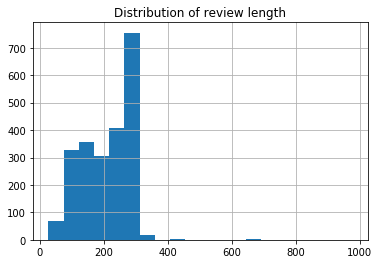

In [4]:
# And take a look at the distribution of the length
df['text_length'].hist(bins=20)
plt.title('Distribution of review length')

In [5]:
from string import punctuation
from nltk.corpus import stopwords

# Transform string data and remove punctuation and stop words
df['text_clean'] = df['text']
# lower case
df['text_clean'] = df['text_clean'].apply(lambda x: str(x).lower())
# remove punctuation
df['text_clean'] = df['text_clean'].apply(lambda x: x.translate(str.maketrans('', '', punctuation)))
# remove stop words
nltk_stop = stopwords.words('english')                                          
df['text_clean'] = df['text_clean'].apply(lambda x: ' '.join([c for c in x.split() if c not in nltk_stop]))

In [6]:
# Check the data again
df.head()

,screen_name,created_at,location,source,hashtags,text,text_length,text_clean
0,Urbandave65,2020-04-21 16:29:36,"Maple Valley, WA",Twitter for iPhone,NaN,@Restlessmom1 @BillFOXLA @sheriffmcmahon @FOXL...,292,restlessmom1 billfoxla sheriffmcmahon foxla im...
1,ASteiner,2020-04-21 16:29:36,"New York, USA",Twitter Web App,"development, COVID19, StrongerTogether",Thank you to @OECD &amp; donor countries for y...,279,thank oecd amp donor countries continued suppo...
2,potter_reagan,2020-04-21 16:29:35,"Oregon, USA",Twitter for iPhone,NaN,have you seen covid plague plague who showed u...,200,seen covid plague plague showed screaming it’s...
3,49erAlumni,2020-04-21 16:29:35,"UNC Charlotte, Charlotte, NC",Twitter Web App,49erAlumni,We know that you — our #49erAlumni — are confr...,265,know — 49eralumni — confronting covid19 threat...
4,CBSPhilly,2020-04-21 16:29:35,"Philadelphia, PA",TweetDeck,"Coronavirus, Pennsylvania",#Coronavirus #Pennsylvania: Statewide COVID-19...,121,coronavirus pennsylvania statewide covid19 cas...


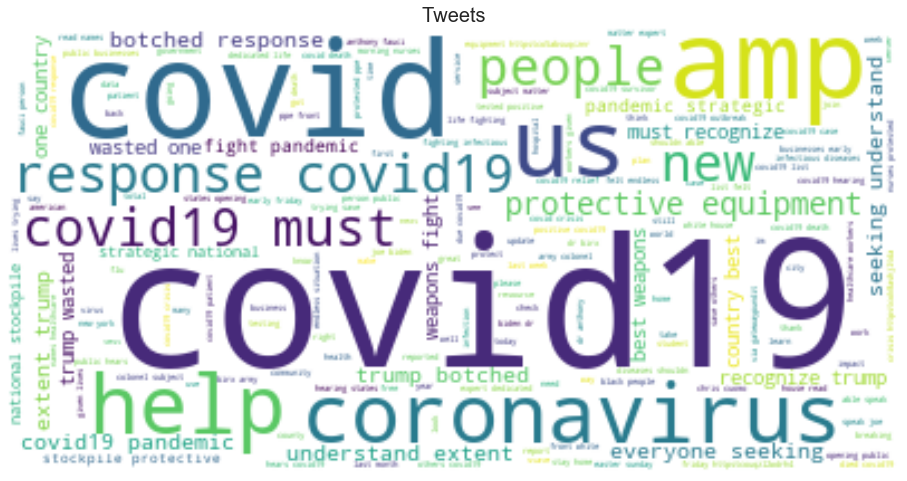

In [7]:
#words cloud of most comman words 
np.random.seed(321)
sns.set(rc={'figure.figsize':(16,16)})
text = ' '.join(df['text_clean'].tolist())

wordcloud = WordCloud(background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Tweets',size=20)
plt.show()

# 2. Sentiment
Use TextBlob for sentiment analysis

In [8]:
# TextBlob stands on the giant shoulders of NLTK and pattern, and plays nicely with both.
# Here, we only extract polarity as it indicates the sentiment 
# as value nearer to 1 means a positive sentiment 
# values nearer to -1 means a negative sentiment. 
# This can also work as a feature for building a machine learning model.
df['sentiment_score'] = df['text_clean'].apply(lambda x: TextBlob(x).sentiment[0])
df['sentiment'] = df['sentiment_score'].apply(lambda x: 'positive' if x > 0 else 'negative' if x < 0 else 'neutral')
df['sentiment_category'] = df['sentiment_score'].apply(lambda x: 1 if x > 0 else 2 if x < 0 else 0)
df[['text_clean','sentiment_score', 'sentiment', 'sentiment_category']].head()

,text_clean,sentiment_score,sentiment,sentiment_category
0,restlessmom1 billfoxla sheriffmcmahon foxla im...,-0.033333,negative,2
1,thank oecd amp donor countries continued suppo...,0.000000,neutral,0
2,seen covid plague plague showed screaming it’s...,0.500000,positive,1
3,know — 49eralumni — confronting covid19 threat...,-0.107143,negative,2
4,coronavirus pennsylvania statewide covid19 cas...,0.100000,positive,1


In [9]:
df.head()

,screen_name,created_at,location,source,hashtags,text,text_length,text_clean,sentiment_score,sentiment,sentiment_category
0,Urbandave65,2020-04-21 16:29:36,"Maple Valley, WA",Twitter for iPhone,NaN,@Restlessmom1 @BillFOXLA @sheriffmcmahon @FOXL...,292,restlessmom1 billfoxla sheriffmcmahon foxla im...,-0.033333,negative,2
1,ASteiner,2020-04-21 16:29:36,"New York, USA",Twitter Web App,"development, COVID19, StrongerTogether",Thank you to @OECD &amp; donor countries for y...,279,thank oecd amp donor countries continued suppo...,0.000000,neutral,0
2,potter_reagan,2020-04-21 16:29:35,"Oregon, USA",Twitter for iPhone,NaN,have you seen covid plague plague who showed u...,200,seen covid plague plague showed screaming it’s...,0.500000,positive,1
3,49erAlumni,2020-04-21 16:29:35,"UNC Charlotte, Charlotte, NC",Twitter Web App,49erAlumni,We know that you — our #49erAlumni — are confr...,265,know — 49eralumni — confronting covid19 threat...,-0.107143,negative,2
4,CBSPhilly,2020-04-21 16:29:35,"Philadelphia, PA",TweetDeck,"Coronavirus, Pennsylvania",#Coronavirus #Pennsylvania: Statewide COVID-19...,121,coronavirus pennsylvania statewide covid19 cas...,0.100000,positive,1


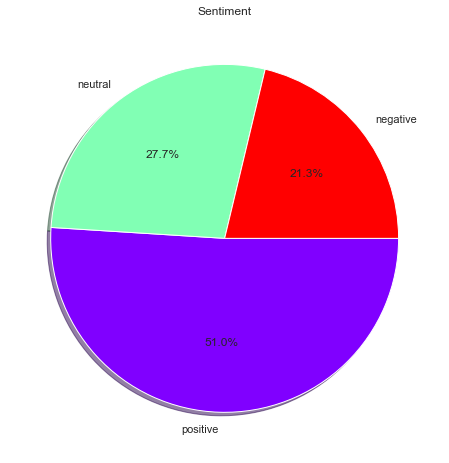

In [14]:
import matplotlib.cm as cm
plt.figure(figsize=(8,8))
#count data rating
counts = df['sentiment'].value_counts()
#rating pie
values = counts.values
labels = counts.index
explode = (0, 0, 0)
colors = cm.rainbow(np.linspace(0, 1, len(labels)))
plt.pie(values, 
        colors=colors, 
        labels=labels,
        explode=explode, 
        autopct='%1.1f%%',
        counterclock=False,
        shadow=True)
plt.title('Sentiment')
plt.show()

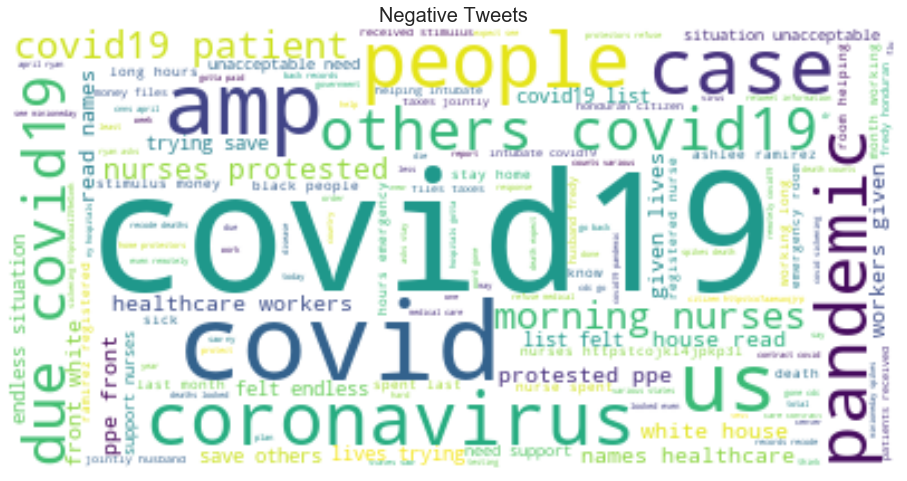

In [11]:
#words cloud of most comman words from negative tweets
np.random.seed(321)
sns.set(rc={'figure.figsize':(16,16)})
text = ' '.join(df['text_clean'][df['sentiment']=='negative'].tolist())

wordcloud = WordCloud(background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Negative Tweets',size=20)
plt.show()

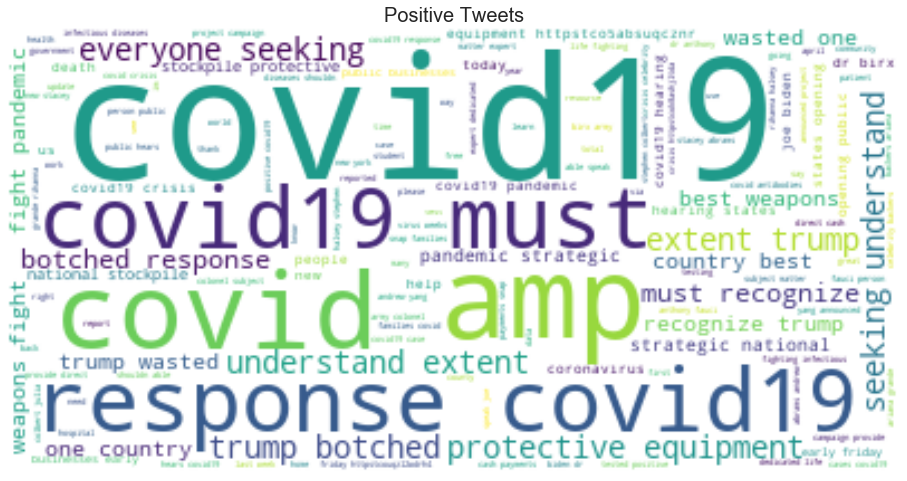

In [12]:
#words cloud of most comman words from positive tweets
np.random.seed(321)
sns.set(rc={'figure.figsize':(16,16)})
text = ' '.join(df['text_clean'][df['sentiment']=='positive'].tolist())

wordcloud = WordCloud(background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Positive Tweets',size=20)
plt.show()

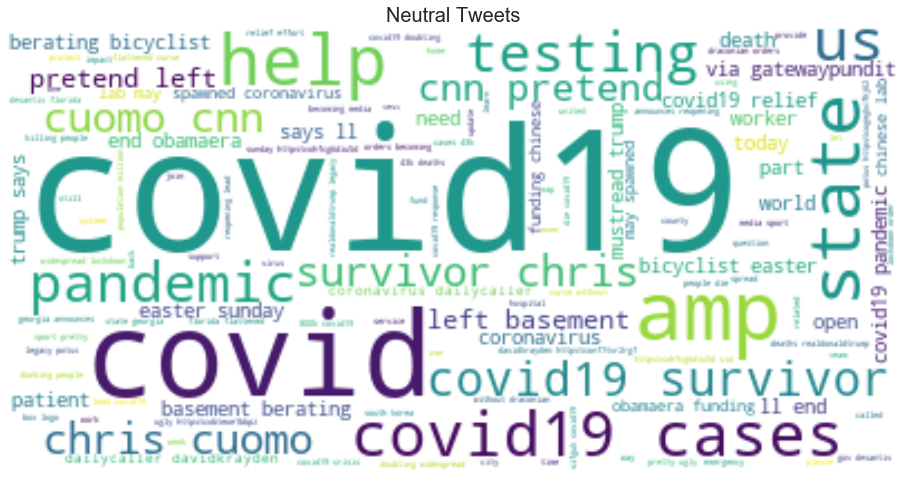

In [13]:
#words cloud of most comman words from neutral tweets
np.random.seed(321)
sns.set(rc={'figure.figsize':(16,16)})
text = ' '.join(df['text_clean'][df['sentiment']=='neutral'].tolist())

wordcloud = WordCloud(background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Neutral Tweets',size=20)
plt.show()